In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1


In [4]:
data['target'].unique()

array([1, 0], dtype=int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


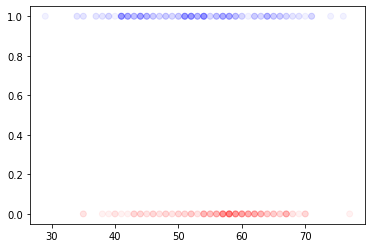

In [6]:
colors={1:'blue',0:'red'}
plt.scatter(data['age'], data['target'], c=data['target'].map(colors),alpha=0.05)

<AxesSubplot:xlabel='age', ylabel='target'>

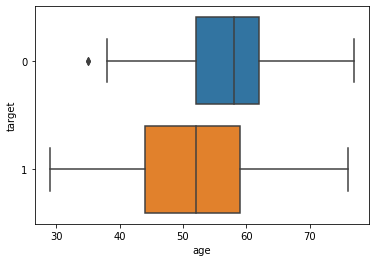

In [7]:
sns.boxplot(y="target", x="age", data=data,orient="h")

<AxesSubplot:xlabel='trestbps', ylabel='target'>

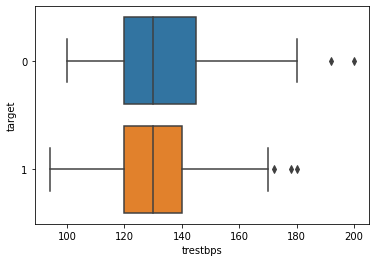

In [8]:
sns.boxplot(y="target", x="trestbps", data=data,orient="h")

<AxesSubplot:xlabel='chol', ylabel='target'>

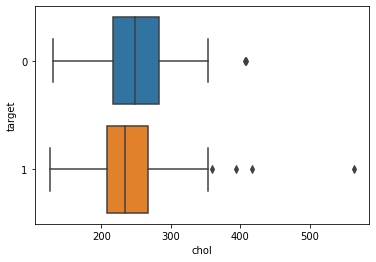

In [9]:
sns.boxplot(y="target", x="chol", data=data,orient="h")

<AxesSubplot:xlabel='thalach', ylabel='target'>

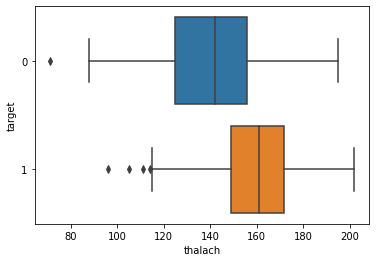

In [10]:
sns.boxplot(y="target", x="thalach", data=data,orient="h")

<AxesSubplot:xlabel='oldpeak', ylabel='target'>

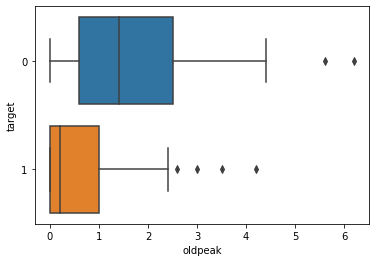

In [11]:
sns.boxplot(y="target", x="oldpeak", data=data,orient="h")

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Naive Baye's Classifier

In [23]:
def naive_bayes(x_train,y_train):
    classifier=GaussianNB()
    classifier.fit(x_train,y_train)
    return classifier

## K-nearest neighbors classifier

In [29]:
def k_nearest_neighbors(x_train,y_train):
    classifier=KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train,y_train)
    return classifier

## Support vector classifier

In [15]:
def svm_classifier(x_train,y_train):
    classifier=SVC(kernel='rbf',gamma='scale')
    classifier.fit(x_train,y_train)
    return classifier

## Decision Tree Classifier

In [16]:
def decision_tree_classifier(x_train,y_train):
    classifier=DecisionTreeClassifier(max_depth=6)
    classifier.fit(x_train,y_train)
    return classifier

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
X=data.drop('target',axis=1)
Y=data['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
def build_and_train_classifier(classification_fn):
    model=classification_fn(x_train,y_train)
    y_pred=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=accuracy=accuracy_score(y_test,y_pred)
    print("Training score: ",train_score)
    print("testing score:",test_score)

In [25]:
build_and_train_classifier(naive_bayes)

Training score:  0.8223140495867769
testing score: 0.8524590163934426


In [30]:
build_and_train_classifier(k_nearest_neighbors)

Training score:  0.7851239669421488
testing score: 0.6557377049180327


c:\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [31]:
build_and_train_classifier(svm_classifier)

Training score:  0.6652892561983471
testing score: 0.7049180327868853


In [32]:
build_and_train_classifier(decision_tree_classifier)

Training score:  0.9834710743801653
testing score: 0.7868852459016393


### splitting of training data again to perform warm_start

In [33]:
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(x_train, y_train, test_size=0.7)

## Random Forest Classifier

In [34]:
rfc= RandomForestClassifier(max_depth=4,n_estimators=2, warm_start=True)

In [35]:
rfc.fit(x_train_1,y_train_1)

RandomForestClassifier(max_depth=4, n_estimators=2, warm_start=True)

In [36]:
y_pred=rfc.predict(x_test)

In [37]:
test_score=accuracy=accuracy_score(y_test,y_pred)
print("Testing score:",test_score)

Testing score: 0.639344262295082


In [38]:
rfc.n_estimators+=2
rfc.fit(x_train_2,y_train_2)

RandomForestClassifier(max_depth=4, n_estimators=4, warm_start=True)

In [39]:
y_pred=rfc.predict(x_test)

In [40]:
test_score=accuracy=accuracy_score(y_test,y_pred)

In [41]:
test_score=accuracy=accuracy_score(y_test,y_pred)
print("Testing score:",test_score)

Testing score: 0.7377049180327869
